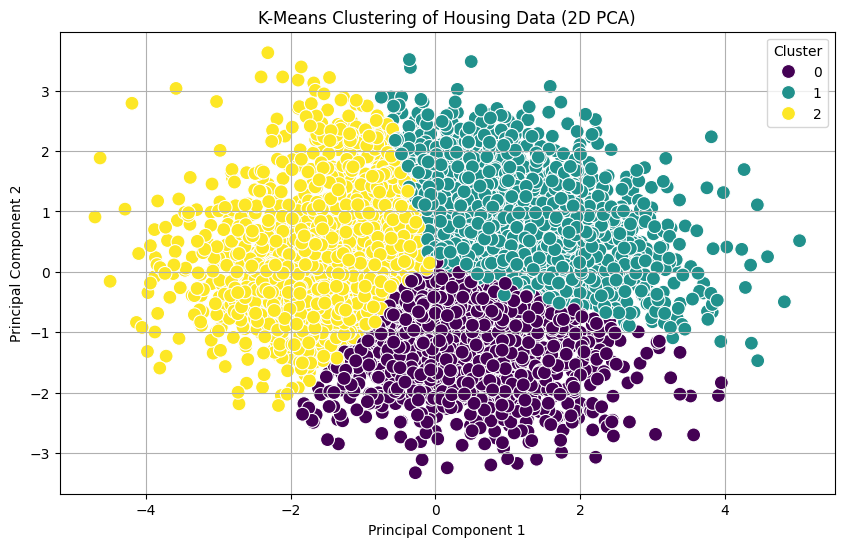

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("USA_Housing.csv")  # Replace with your actual path

# Drop non-numeric columns
df.drop("Address", axis=1, inplace=True)

# Optional: Drop 'Price' if not needed for clustering
# df.drop("Price", axis=1, inplace=True)

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# Use PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title("K-Means Clustering of Housing Data (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
